In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import plotly.express as px
import json

#  Step 1 :- Problem Statement

- We are given four datasets containing the information of all matches played in world cup 2022.
- From the given data create a team of 11 best players across the tournament.
- That include 2 openers batsman, 2 middle order batsman, 2 batting all rounders, 2 bowling all rounders and 3 specialist bowlers.

### Our execution plan

- We are given data into json file which is not arranged properly.
- Our plan is to clean data
- After cleaning data add viaualization on it.
- From visualization fetch the required result.

#### Data Cleaning and preprocessing.
- We are given data into json file.
- we have to perform data cleaning over it using pandas.
- make a list of columns that has to be calculated for selecting players for each role based on given criteria and parameters.

#### Data Visualization.
- Plot the graphs of cleaned data.
- Choose the best players that make best fit for that playing role.

#### Calculate results.
- Select all players and create a team of 11.
- Calculate the total performance of whole team.

# Step 2 :- Data Wrangling

There are four datasets in our project
- 1. Match results dataset
- 2. Batting dataset
- 3. Bowling dataset
- 4. Players dataset

###  `Match Results dataset`

#### Data Gathering 

In [10]:
# loading data through a json file

with open('t20_json_files/t20_wc_match_results.json') as f:
    data = json.load(f)
data

[{'matchSummary': [{'team1': 'Namibia',
    'team2': 'Sri Lanka',
    'winner': 'Namibia',
    'margin': '55 runs',
    'ground': 'Geelong',
    'matchDate': 'Oct 16, 2022',
    'scorecard': 'T20I # 1823'},
   {'team1': 'Netherlands',
    'team2': 'U.A.E.',
    'winner': 'Netherlands',
    'margin': '3 wickets',
    'ground': 'Geelong',
    'matchDate': 'Oct 16, 2022',
    'scorecard': 'T20I # 1825'},
   {'team1': 'Scotland',
    'team2': 'West Indies',
    'winner': 'Scotland',
    'margin': '42 runs',
    'ground': 'Hobart',
    'matchDate': 'Oct 17, 2022',
    'scorecard': 'T20I # 1826'},
   {'team1': 'Ireland',
    'team2': 'Zimbabwe',
    'winner': 'Zimbabwe',
    'margin': '31 runs',
    'ground': 'Hobart',
    'matchDate': 'Oct 17, 2022',
    'scorecard': 'T20I # 1828'},
   {'team1': 'Namibia',
    'team2': 'Netherlands',
    'winner': 'Netherlands',
    'margin': '5 wickets',
    'ground': 'Geelong',
    'matchDate': 'Oct 18, 2022',
    'scorecard': 'T20I # 1830'},
   {'team1':

In [11]:
len(data)

# we can see that the data has only one element
# then futther the inside dictionary also has single element 
# where our data is present

1

In [12]:
data[0]['matchSummary']    # this is our data so convert it to a dataframe

[{'team1': 'Namibia',
  'team2': 'Sri Lanka',
  'winner': 'Namibia',
  'margin': '55 runs',
  'ground': 'Geelong',
  'matchDate': 'Oct 16, 2022',
  'scorecard': 'T20I # 1823'},
 {'team1': 'Netherlands',
  'team2': 'U.A.E.',
  'winner': 'Netherlands',
  'margin': '3 wickets',
  'ground': 'Geelong',
  'matchDate': 'Oct 16, 2022',
  'scorecard': 'T20I # 1825'},
 {'team1': 'Scotland',
  'team2': 'West Indies',
  'winner': 'Scotland',
  'margin': '42 runs',
  'ground': 'Hobart',
  'matchDate': 'Oct 17, 2022',
  'scorecard': 'T20I # 1826'},
 {'team1': 'Ireland',
  'team2': 'Zimbabwe',
  'winner': 'Zimbabwe',
  'margin': '31 runs',
  'ground': 'Hobart',
  'matchDate': 'Oct 17, 2022',
  'scorecard': 'T20I # 1828'},
 {'team1': 'Namibia',
  'team2': 'Netherlands',
  'winner': 'Netherlands',
  'margin': '5 wickets',
  'ground': 'Geelong',
  'matchDate': 'Oct 18, 2022',
  'scorecard': 'T20I # 1830'},
 {'team1': 'Sri Lanka',
  'team2': 'U.A.E.',
  'winner': 'Sri Lanka',
  'margin': '79 runs',
  'gr

In [13]:
# convert it into a dataframe

df_matches = pd.DataFrame(data[0]['matchSummary'])

#### Data Cleaning

In [14]:
df_matches.head()

,team1,team2,winner,margin,ground,matchDate,scorecard
0,Namibia,Sri Lanka,Namibia,55 runs,Geelong,"Oct 16, 2022",T20I # 1823
1,Netherlands,U.A.E.,Netherlands,3 wickets,Geelong,"Oct 16, 2022",T20I # 1825
2,Scotland,West Indies,Scotland,42 runs,Hobart,"Oct 17, 2022",T20I # 1826
3,Ireland,Zimbabwe,Zimbabwe,31 runs,Hobart,"Oct 17, 2022",T20I # 1828
4,Namibia,Netherlands,Netherlands,5 wickets,Geelong,"Oct 18, 2022",T20I # 1830


In [15]:
df_matches.shape

(45, 7)

In [16]:
# here we don't want to access the scorecard, so instead of scorecard we rename that column as match_id

df_matches.rename({'scorecard':'match_id'}, axis=1, inplace=True)
df_matches.head()

,team1,team2,winner,margin,ground,matchDate,match_id
0,Namibia,Sri Lanka,Namibia,55 runs,Geelong,"Oct 16, 2022",T20I # 1823
1,Netherlands,U.A.E.,Netherlands,3 wickets,Geelong,"Oct 16, 2022",T20I # 1825
2,Scotland,West Indies,Scotland,42 runs,Hobart,"Oct 17, 2022",T20I # 1826
3,Ireland,Zimbabwe,Zimbabwe,31 runs,Hobart,"Oct 17, 2022",T20I # 1828
4,Namibia,Netherlands,Netherlands,5 wickets,Geelong,"Oct 18, 2022",T20I # 1830


###  `Batting Records dataset`

#### Data Gathering 

In [17]:
with open('t20_json_files/t20_wc_batting_summary.json') as f:
    data = json.load(f)
    
    all_records = []
    
    for rec in data:
        all_records.extend(rec['battingSummary'])
        
df_batting = pd.DataFrame(all_records)

#### Data Cleaning

In [18]:
df_batting.head()

,match,teamInnings,battingPos,batsmanName,dismissal,runs,balls,4s,6s,SR
0,Namibia Vs Sri Lanka,Namibia,1,Michael van Lingen,c Pramod Madushan b Chameera,3,6,0,0,50.00
1,Namibia Vs Sri Lanka,Namibia,2,Divan la Cock,c Shanaka b Pramod Madushan,9,9,1,0,100.00
2,Namibia Vs Sri Lanka,Namibia,3,Jan Nicol Loftie-Eaton,c â€ Mendis b Karunaratne,20,12,1,2,166.66
3,Namibia Vs Sri Lanka,Namibia,4,Stephan Baard,c DM de Silva b Pramod Madushan,26,24,2,0,108.33
4,Namibia Vs Sri Lanka,Namibia,5,Gerhard Erasmus(c),c Gunathilaka b PWH de Silva,20,24,0,0,83.33


In [19]:
df_batting.shape

(699, 10)

In [20]:
# the dissmissal column contains some blank values and a record of that wicket,
# we just wants that the batsman is out or not
# so replacing values by out and blank/null values by not out

df_batting['dismissed'] = df_batting.dismissal.apply(lambda x: '1' if len(x)>0 else '0')
df_batting.head(20)

,match,teamInnings,battingPos,batsmanName,dismissal,runs,balls,4s,6s,SR,dismissed
0,Namibia Vs Sri Lanka,Namibia,1,Michael van Lingen,c Pramod Madushan b Chameera,3,6,0,0,50.00,1
1,Namibia Vs Sri Lanka,Namibia,2,Divan la Cock,c Shanaka b Pramod Madushan,9,9,1,0,100.00,1
2,Namibia Vs Sri Lanka,Namibia,3,Jan Nicol Loftie-Eaton,c â€ Mendis b Karunaratne,20,12,1,2,166.66,1
3,Namibia Vs Sri Lanka,Namibia,4,Stephan Baard,c DM de Silva b Pramod Madushan,26,24,2,0,108.33,1
4,Namibia Vs Sri Lanka,Namibia,5,Gerhard Erasmus(c),c Gunathilaka b PWH de Silva,20,24,0,0,83.33,1
5,Namibia Vs Sri Lanka,Namibia,6,Jan Frylinck,run out (Gunathilaka/â€ Mendis),44,28,4,0,157.14,1
6,Namibia Vs Sri Lanka,Namibia,7,David Wiese,c â€ Mendis b Theekshana,0,1,0,0,0.00,1
7,Namibia Vs Sri Lanka,Namibia,8,JJ Smit,,31,16,2,2,193.75,0
8,Namibia Vs Sri Lanka,Sri Lanka,1,Pathum Nissanka,c Smit b Shikongo,9,10,1,0,90.00,1
9,Namibia Vs Sri Lanka,Sri Lanka,2,Kusal Mendisâ€,c â€ Green b Wiese,6,6,0,0,100.00,1


In [21]:
# there are some special characters in players names which should be cleaned


df_batting['batsmanName'] = df_batting['batsmanName'].apply(lambda x : x.replace('â€', ''))
df_batting['batsmanName'] = df_batting['batsmanName'].apply(lambda x : x.replace('\xa0', ''))
df_batting.head(10)

,match,teamInnings,battingPos,batsmanName,dismissal,runs,balls,4s,6s,SR,dismissed
0,Namibia Vs Sri Lanka,Namibia,1,Michael van Lingen,c Pramod Madushan b Chameera,3,6,0,0,50.00,1
1,Namibia Vs Sri Lanka,Namibia,2,Divan la Cock,c Shanaka b Pramod Madushan,9,9,1,0,100.00,1
2,Namibia Vs Sri Lanka,Namibia,3,Jan Nicol Loftie-Eaton,c â€ Mendis b Karunaratne,20,12,1,2,166.66,1
3,Namibia Vs Sri Lanka,Namibia,4,Stephan Baard,c DM de Silva b Pramod Madushan,26,24,2,0,108.33,1
4,Namibia Vs Sri Lanka,Namibia,5,Gerhard Erasmus(c),c Gunathilaka b PWH de Silva,20,24,0,0,83.33,1
5,Namibia Vs Sri Lanka,Namibia,6,Jan Frylinck,run out (Gunathilaka/â€ Mendis),44,28,4,0,157.14,1
6,Namibia Vs Sri Lanka,Namibia,7,David Wiese,c â€ Mendis b Theekshana,0,1,0,0,0.00,1
7,Namibia Vs Sri Lanka,Namibia,8,JJ Smit,,31,16,2,2,193.75,0
8,Namibia Vs Sri Lanka,Sri Lanka,1,Pathum Nissanka,c Smit b Shikongo,9,10,1,0,90.00,1
9,Namibia Vs Sri Lanka,Sri Lanka,2,Kusal Mendis,c â€ Green b Wiese,6,6,0,0,100.00,1


In [22]:
# there is no column in df_batting table that matches with any column in df_matches
# so, we are getting two columns of team names from df_matches dataframe
# combines it with its match id into a dictionary
# and create a match_id column into df_batting table

match_id_dict = {}

for key, row in df_matches.iterrows():
    key1 = row['team1'] + ' Vs ' + row['team2']
    key2 = row['team2'] + ' Vs ' + row['team1']
    
    match_id_dict[key1] = row['match_id']
    match_id_dict[key2] = row['match_id']

In [23]:
df_batting['match_id'] = df_batting['match'].map(match_id_dict) # adds each value from dict to match_id by mapping match values to subsequent keys in dict

df_batting.head()

,match,teamInnings,battingPos,batsmanName,dismissal,runs,balls,4s,6s,SR,dismissed,match_id
0,Namibia Vs Sri Lanka,Namibia,1,Michael van Lingen,c Pramod Madushan b Chameera,3,6,0,0,50.00,1,T20I # 1823
1,Namibia Vs Sri Lanka,Namibia,2,Divan la Cock,c Shanaka b Pramod Madushan,9,9,1,0,100.00,1,T20I # 1823
2,Namibia Vs Sri Lanka,Namibia,3,Jan Nicol Loftie-Eaton,c â€ Mendis b Karunaratne,20,12,1,2,166.66,1,T20I # 1823
3,Namibia Vs Sri Lanka,Namibia,4,Stephan Baard,c DM de Silva b Pramod Madushan,26,24,2,0,108.33,1,T20I # 1823
4,Namibia Vs Sri Lanka,Namibia,5,Gerhard Erasmus(c),c Gunathilaka b PWH de Silva,20,24,0,0,83.33,1,T20I # 1823


### `Bowling Records Dataset`

#### Data Gathering

In [24]:
with open('t20_json_files/t20_wc_bowling_summary.json') as f:
    data = json.load(f)
    
    all_records = []
    
    for rec in data:
        all_records.extend(rec['bowlingSummary'])
        
df_bowling = pd.DataFrame(all_records)

#### Data Cleaning

In [25]:
df_bowling.head()

,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls
0,Namibia Vs Sri Lanka,Sri Lanka,Maheesh Theekshana,4,0,23,1,5.75,7,0,0,2,0
1,Namibia Vs Sri Lanka,Sri Lanka,Dushmantha Chameera,4,0,39,1,9.75,6,3,1,2,0
2,Namibia Vs Sri Lanka,Sri Lanka,Pramod Madushan,4,0,37,2,9.25,6,3,1,0,0
3,Namibia Vs Sri Lanka,Sri Lanka,Chamika Karunaratne,4,0,36,1,9.00,7,3,1,1,0
4,Namibia Vs Sri Lanka,Sri Lanka,Wanindu Hasaranga de Silva,4,0,27,1,6.75,8,1,1,0,0


In [26]:
# creating a match_id column 

df_bowling['match_id'] = df_bowling['match'].map(match_id_dict)

df_bowling.head()

,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls,match_id
0,Namibia Vs Sri Lanka,Sri Lanka,Maheesh Theekshana,4,0,23,1,5.75,7,0,0,2,0,T20I # 1823
1,Namibia Vs Sri Lanka,Sri Lanka,Dushmantha Chameera,4,0,39,1,9.75,6,3,1,2,0,T20I # 1823
2,Namibia Vs Sri Lanka,Sri Lanka,Pramod Madushan,4,0,37,2,9.25,6,3,1,0,0,T20I # 1823
3,Namibia Vs Sri Lanka,Sri Lanka,Chamika Karunaratne,4,0,36,1,9.00,7,3,1,1,0,T20I # 1823
4,Namibia Vs Sri Lanka,Sri Lanka,Wanindu Hasaranga de Silva,4,0,27,1,6.75,8,1,1,0,0,T20I # 1823


### `Player Records Dataset`

#### Data Gathering

In [30]:
with open('t20_json_files/t20_wc_player_info.json') as f:
    data = json.load(f)
    
df_players = pd.DataFrame(data)

#### Data Cleaning

In [31]:
df_players.head()

,name,team,battingStyle,bowlingStyle,playingRole,description
0,Michael van Lingen,Namibia,Left hand Bat,Left arm Medium,Bowling Allrounder,
1,Divan la Cock,Namibia,Right hand Bat,Legbreak,Opening Batter,
2,Jan Nicol Loftie-Eaton,Namibia,Left hand Bat,"Right arm Medium, Legbreak",Batter,
3,Stephan Baard,Namibia,Right hand Bat,Right arm Medium fast,Batter,
4,Gerhard Erasmus(c),Namibia,Right hand Bat,Right arm Offbreak,Allrounder,


In [32]:
df_players.duplicated().sum()

0

In [33]:
# some player names has duplicated
df_players.drop_duplicates(inplace=True)

In [34]:
# no need of description column drop it

df_players.drop(columns='description', inplace=True)

In [35]:
# some player names contains special characters and captain has (c) as abbrevation 

df_players['name'] = df_players['name'].apply(lambda x : x.replace('â€', ''))
df_players['name'] = df_players['name'].apply(lambda x : x.replace('\xa0', ''))
df_players['name'] = df_players['name'].apply(lambda x : x.replace('(c)', ''))

## Creating new dataframes
data in this datasets is not available to fulfill our analysis process. So, we have to create dataframes for batting and bowling performances & add columns to those dataframes respectively.

**Batting Parameters**
- `Runs Scored` :- Total number of runs scored by the batsman
- `Innings Batted` :- Total number of innings a batsman got a chance to bat
- `Innings Dismissed` :- To find the number of innings batsman got out
- `Batting Average` :-  Average runs scored in an innings
- `Balls Faced` :- Total number of balls faced by the batsman
- `Batting Strike Rate` No of runs scored per 100 balls 
- `Batting Position` :- Batting position of a player
- `Boundary Runs Scored` :- to find the total number of runs scored by hitting fours and sixes
- `Boundary Percentage Scored` :- Percentage of boundaries scored by the Batsman
- `Average Balls Faced` :- Average balls faced by the batter in an innings

**Bowling Parameters**
 
- `Wickets` :- Total number of wickets taken by a bowler
- `Balls Bowled` :- Total number of balls bowled by the bowler
- `Runs Conceded` :- Total runs conceded by the bowler
- `Bowling Economy` :- Average number of runs conceded in an over
- `Bowling Strike Rate` :- Number of balls bowled per wicket
- `Bowling Average` :- No. of runs allowed per wicket  
- `Innings Bowled` :- Total number of innings bowled by a bowler
- `Dot Balls Percentage` :- Percentage of dot balls bowled by a bowler
- `Boundary Runs Conceded` :- to find the total number of runs conceded by bowlers in boundaries
- `Boundary Percentage Conceded` :- Percentage of boundaries conceded by the Bowler

### Adding batting parameters from df_batting dataframe to batsman df<br>

In [36]:
batting = df_batting.copy()

In [37]:
batting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   match        699 non-null    object
 1   teamInnings  699 non-null    object
 2   battingPos   699 non-null    int64 
 3   batsmanName  699 non-null    object
 4   dismissal    699 non-null    object
 5   runs         699 non-null    object
 6   balls        699 non-null    object
 7   4s           699 non-null    object
 8   6s           699 non-null    object
 9   SR           699 non-null    object
 10  dismissed    699 non-null    object
 11  match_id     699 non-null    object
dtypes: int64(1), object(11)
memory usage: 65.7+ KB


In [38]:
batting.replace('-',0, inplace=True)

In [39]:
# changing datatype to numeric to perform calculations

batting = batting.astype({'runs':int,
               'balls': int,
               '4s': int,
               '6s': int,
               'SR': float,
               'dismissed' : int})

In [40]:
batting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   match        699 non-null    object 
 1   teamInnings  699 non-null    object 
 2   battingPos   699 non-null    int64  
 3   batsmanName  699 non-null    object 
 4   dismissal    699 non-null    object 
 5   runs         699 non-null    int32  
 6   balls        699 non-null    int32  
 7   4s           699 non-null    int32  
 8   6s           699 non-null    int32  
 9   SR           699 non-null    float64
 10  dismissed    699 non-null    int32  
 11  match_id     699 non-null    object 
dtypes: float64(1), int32(5), int64(1), object(5)
memory usage: 52.0+ KB


In [41]:
# some batsmanName contains (c) tag that treats same name as two different names 

batting['batsmanName'] = batting['batsmanName'].str.strip('(c)')
batting

,match,teamInnings,battingPos,batsmanName,dismissal,runs,balls,4s,6s,SR,dismissed,match_id
0,Namibia Vs Sri Lanka,Namibia,1,Michael van Lingen,c Pramod Madushan b Chameera,3,6,0,0,50.00,1,T20I # 1823
1,Namibia Vs Sri Lanka,Namibia,2,Divan la Cock,c Shanaka b Pramod Madushan,9,9,1,0,100.00,1,T20I # 1823
2,Namibia Vs Sri Lanka,Namibia,3,Jan Nicol Loftie-Eaton,c â€ Mendis b Karunaratne,20,12,1,2,166.66,1,T20I # 1823
3,Namibia Vs Sri Lanka,Namibia,4,Stephan Baard,c DM de Silva b Pramod Madushan,26,24,2,0,108.33,1,T20I # 1823
4,Namibia Vs Sri Lanka,Namibia,5,Gerhard Erasmus,c Gunathilaka b PWH de Silva,20,24,0,0,83.33,1,T20I # 1823
...,...,...,...,...,...,...,...,...,...,...,...,...
694,Pakistan Vs England,England,3,Phil Salt,c Iftikhar Ahmed b Haris Rauf,10,9,2,0,111.11,1,T20I # 1879
695,Pakistan Vs England,England,4,Ben Stokes,,52,49,5,1,106.12,0,T20I # 1879
696,Pakistan Vs England,England,5,Harry Brook,c Shaheen Shah Afridi b Shadab Khan,20,23,1,0,86.95,1,T20I # 1879
697,Pakistan Vs England,England,6,Moeen Ali,b Mohammad Wasim,19,13,3,0,146.15,1,T20I # 1879


In [42]:
# set index to name to directly assign a column

df_players.set_index('name', inplace=True)

In [43]:
# create a dataframe which stores all calculated columns related to batting data
batsman = df_players.copy()

In [44]:
# adding derived columns to dataframe

batsman['runsScored'] = batting.groupby('batsmanName')['runs'].sum()
batsman['inningsBatted'] = batting.groupby('batsmanName')['match'].count()
batsman['inningsDismissed'] = batting.groupby('batsmanName')['dismissed'].sum()
batsman['ballsFaced'] = batting.groupby('batsmanName')['balls'].sum()
batsman['battingPos'] = batting.groupby('batsmanName')['battingPos'].mean().round()
batsman['boundaryRuns'] = batting.groupby('batsmanName')['4s'].sum()*4 + batting.groupby('batsmanName')['6s'].sum()*6
batsman['boundary%'] = round(batsman['boundaryRuns'] / batsman['runsScored'] * 100, 2)
batsman['battingAvg'] = round(batsman['runsScored'] / batsman['inningsDismissed'].apply(lambda x: x if x!=0 else 1) , 2)
batsman['avgBallsFaced'] = round(batsman['ballsFaced']/batsman['inningsBatted'], 2)
batsman['battingS/R'] = round(batsman['runsScored'] / batsman['ballsFaced'] * 100, 2)

In [45]:
batsman.sample(20)

,team,battingStyle,bowlingStyle,playingRole,runsScored,inningsBatted,inningsDismissed,ballsFaced,battingPos,boundaryRuns,boundary%,battingAvg,avgBallsFaced,battingS/R
name,,,,,,,,,,,,,,
Zane Green,Namibia,Left hand Bat,,Wicketkeeper Batter,2.0,1.0,1.0,3.0,8.0,0.0,0.00,2.00,3.00,66.67
Danushka Gunathilaka,Sri Lanka,Left hand Bat,Right arm Offbreak,Allrounder,0.0,1.0,1.0,1.0,4.0,0.0,NaN,0.00,1.00,0.00
Bernard Scholtz,Namibia,Right hand Bat,Slow Left arm Orthodox,Bowler,1.0,1.0,0.0,1.0,10.0,0.0,0.00,1.00,1.00,100.00
Regis Chakabva,Zimbabwe,Right hand Bat,Right arm Offbreak,Wicketkeeper Batter,45.0,8.0,8.0,64.0,3.0,26.0,57.78,5.62,8.00,70.31
Soumya Sarkar,Bangladesh,Left hand Bat,Right arm Medium fast,Middle order Batter,49.0,4.0,4.0,39.0,2.0,30.0,61.22,12.25,9.75,125.64
Dinesh Karthik,India,Right hand Bat,Right arm Offbreak,Wicketkeeper Batter,14.0,3.0,3.0,22.0,7.0,4.0,28.57,4.67,7.33,63.64
Alex Hales,England,Right hand Bat,Right arm Medium,Opening Batter,212.0,6.0,5.0,144.0,2.0,136.0,64.15,42.40,24.00,147.22
Logan van Beek,Netherlands,Right hand Bat,Right arm Medium fast,Bowler,15.0,4.0,2.0,23.0,8.0,0.0,0.00,7.50,5.75,65.22
Bhuvneshwar Kumar,India,Right hand Bat,Right arm Medium,Bowler,4.0,1.0,0.0,6.0,9.0,0.0,0.00,4.00,6.00,66.67


In [47]:
batsman.shape

(219, 14)

In [108]:
batsman.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, Michael van Lingen to Mehidy Hasan Miraz
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   team              219 non-null    object 
 1   battingStyle      219 non-null    object 
 2   bowlingStyle      219 non-null    object 
 3   playingRole       219 non-null    object 
 4   runsScored        219 non-null    int32  
 5   inningsBatted     219 non-null    int32  
 6   inningsDismissed  219 non-null    int32  
 7   ballsFaced        219 non-null    int32  
 8   battingPos        219 non-null    int32  
 9   boundaryRuns      219 non-null    int32  
 10  boundary%         219 non-null    float64
 11  battingAvg        219 non-null    float64
 12  avgBallsFaced     219 non-null    float64
 13  battingS/R        219 non-null    float64
dtypes: float64(4), int32(6), object(4)
memory usage: 20.5+ KB


In [109]:
batsman.fillna('0', inplace=True)

In [85]:
batsman[['runsScored', 'inningsBatted', 'inningsDismissed', 'ballsFaced', 'battingPos', 'boundaryRuns']] = batsman[['runsScored', 'inningsBatted', 'inningsDismissed', 'ballsFaced', 'battingPos', 'boundaryRuns']].astype(int)

In [107]:
batsman[['boundary%', 'battingAvg', 'avgBallsFaced', 'battingS/R']] = batsman[['boundary%', 'battingAvg', 'avgBallsFaced', 'battingS/R']].astype(float)

There are some who didn't bat in this tournament that's why some values are null

### Adding bowling parameters from df_bowling dataframe to bowler df<br>


In [86]:
bowling = df_bowling.copy()

In [87]:
bowling.sample(2)

,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls,match_id
168,Afghanistan Vs England,Afghanistan,Mohammad Nabi,3,0,16,1,5.33,6,0,0,0,0,T20I # 1840
67,Sri Lanka Vs U.A.E.,U.A.E.,Basil Hameed,1,0,13,0,13.00,1,1,1,0,0,T20I # 1832


In [88]:
bowling = bowling.astype({'overs': float})

In [89]:
# over columns contains some float values that is not suitable for further calcutation
# so, we have to convert it into no. of balls

bowling['noBalls'] = np.floor(bowling['overs'])*6 + bowling['overs']%1*10

In [90]:
bowling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   match        500 non-null    object 
 1   bowlingTeam  500 non-null    object 
 2   bowlerName   500 non-null    object 
 3   overs        500 non-null    float64
 4   maiden       500 non-null    object 
 5   runs         500 non-null    object 
 6   wickets      500 non-null    object 
 7   economy      500 non-null    object 
 8   0s           500 non-null    object 
 9   4s           500 non-null    object 
 10  6s           500 non-null    object 
 11  wides        500 non-null    object 
 12  noBalls      500 non-null    float64
 13  match_id     500 non-null    object 
dtypes: float64(2), object(12)
memory usage: 54.8+ KB


In [91]:
bowling = bowling.astype({
                  'maiden': int, 
                  'runs': int,
                  'wickets': int,
                  'economy': float,
                  '0s': int,
                  '4s': int, 
                  '6s': int,
                  'wides': int,
                  'noBalls': int
})

In [92]:
# create a new dataframe of bowler which consists of all calculated columns of bowlers

bowler = df_players.copy()

In [93]:
bowling

,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls,match_id
0,Namibia Vs Sri Lanka,Sri Lanka,Maheesh Theekshana,4.0,0,23,1,5.75,7,0,0,2,24,T20I # 1823
1,Namibia Vs Sri Lanka,Sri Lanka,Dushmantha Chameera,4.0,0,39,1,9.75,6,3,1,2,24,T20I # 1823
2,Namibia Vs Sri Lanka,Sri Lanka,Pramod Madushan,4.0,0,37,2,9.25,6,3,1,0,24,T20I # 1823
3,Namibia Vs Sri Lanka,Sri Lanka,Chamika Karunaratne,4.0,0,36,1,9.00,7,3,1,1,24,T20I # 1823
4,Namibia Vs Sri Lanka,Sri Lanka,Wanindu Hasaranga de Silva,4.0,0,27,1,6.75,8,1,1,0,24,T20I # 1823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Pakistan Vs England,Pakistan,Naseem Shah,4.0,0,30,0,7.50,15,3,1,1,24,T20I # 1879
496,Pakistan Vs England,Pakistan,Haris Rauf,4.0,0,23,2,5.75,13,3,0,1,24,T20I # 1879
497,Pakistan Vs England,Pakistan,Shadab Khan,4.0,0,20,1,5.00,10,1,0,0,24,T20I # 1879
498,Pakistan Vs England,Pakistan,Mohammad Wasim,4.0,0,38,1,9.50,5,5,0,2,24,T20I # 1879


In [94]:
bowler['wickets'] = bowling.groupby('bowlerName')['wickets'].sum()
bowler['ballsBowled'] = bowling.groupby('bowlerName')['noBalls'].sum()
bowler['runsConceded'] = bowling.groupby('bowlerName')['runs'].sum()
bowler['bowlerEconomy'] = round(bowler['runsConceded']/bowler['ballsBowled']*6, 2)
# if wickets = 0 then it gives infinity, so apply lambda function
bowler['bowlingS/R'] = round(bowler['ballsBowled']/bowler['wickets'].apply(lambda x: x if x!=0 else 1), 2)
bowler['bowlingAvg'] = round(bowler['runsConceded']/bowler['wickets'].apply(lambda x: x if x!=0 else 1), 2)
bowler['inningsBowled'] = bowling.groupby('bowlerName')['wickets'].count()
bowler['dotBalls%'] = round(bowling.groupby('bowlerName')['0s'].sum()/bowling.groupby('bowlerName')['noBalls'].sum()*100, 2)
bowler['boundaryRunsConceded'] = bowling.groupby('bowlerName')['4s'].sum() +  bowling.groupby('bowlerName')['6s'].sum()
bowler['boundaryConceded%'] = round(bowler['boundaryRunsConceded']/bowler['runsConceded']*100, 2)

In [95]:
bowler.sample(10)

,team,battingStyle,bowlingStyle,playingRole,wickets,ballsBowled,runsConceded,bowlerEconomy,bowlingS/R,bowlingAvg,inningsBowled,dotBalls%,boundaryRunsConceded,boundaryConceded%
name,,,,,,,,,,,,,,
Kyle Mayers,West Indies,Left hand Bat,Right arm Medium,Batting Allrounder,0.0,18.0,41.0,13.67,18.00,41.00,2.0,44.44,8.0,19.51
Axar Patel,India,Left hand Bat,Slow Left arm Orthodox,Bowling Allrounder,3.0,80.0,115.0,8.62,26.67,38.33,5.0,36.25,13.0,11.30
Roelof van der Merwe,Netherlands,Right hand Bat,Slow Left arm Orthodox,Allrounder,2.0,66.0,75.0,6.82,33.00,37.50,6.0,34.85,6.0,8.00
Fakhar Zaman,Pakistan,Left hand Bat,Slow Left arm Orthodox,Opening Batter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sean Williams,Zimbabwe,Left hand Bat,Slow Left arm Orthodox,Middle order Batter,5.0,108.0,111.0,6.17,21.60,22.20,7.0,30.56,5.0,4.50
Richie Berrington,Scotland,Right hand Bat,Right arm Medium fast,Top order Batter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Max O'Dowd,Netherlands,Right hand Bat,Right arm Offbreak,Opening Batter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fareed Ahmad,Afghanistan,Left hand Bat,Left arm Fast medium,Bowler,1.0,24.0,48.0,12.00,24.00,48.00,2.0,20.83,6.0,12.50
Shamarh Brooks,West Indies,Right hand Bat,Legbreak,Top order Batter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
bowler.shape

(219, 14)

In [100]:
bowler.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, Michael van Lingen to Mehidy Hasan Miraz
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   team                  219 non-null    object 
 1   battingStyle          219 non-null    object 
 2   bowlingStyle          219 non-null    object 
 3   playingRole           219 non-null    object 
 4   wickets               219 non-null    int32  
 5   ballsBowled           219 non-null    int32  
 6   runsConceded          219 non-null    int32  
 7   bowlerEconomy         219 non-null    float64
 8   bowlingS/R            219 non-null    float64
 9   bowlingAvg            219 non-null    float64
 10  inningsBowled         219 non-null    int32  
 11  dotBalls%             219 non-null    float64
 12  boundaryRunsConceded  219 non-null    int32  
 13  boundaryConceded%     219 non-null    float64
dtypes: float64(5), int32(5), object(4)
memory usage

In [101]:
# df contains some nan values i.e. records of batsman who didn't bowl, fill those nan values with 0
bowler.fillna(0, inplace=True)

In [102]:
# changing datatype
bowler[['wickets', 'ballsBowled', 'runsConceded', 'inningsBowled', 'boundaryRunsConceded']] = bowler[['wickets', 'ballsBowled', 'runsConceded', 'inningsBowled', 'boundaryRunsConceded']].astype(int)

### Selecting players for each playing role
- below are some criteria or requirement a player must have to be selected for a playing role in a team.
- select players according to that and create a dataframe of each type


#### `Player role` , `No. of players` for that role and `parameters and eligibility criteria` to be selected is predefined to select the best ones

**Openers (2)**
- Batting Average > 30
- Strike Rate > 140
- Innings Batted > 3
- Boundary %  > 50
- Batting Position < 4

**Middle Orders (2)**
- Batting Average > 40
- Strike Rate > 125
- Innings Batted > 3
- Avg. Balls Faced > 20
- Batting Position > 2

**Batting All-rounders (2)**
- Batting Average > 25
- Strike Rate > 130
- Innings Batted > 3
- Avg. Balls Faced > 12
- Batting Position > 4
- Innings Bowled > 1

**Bowling All-rounders (2)**
- Batting Average > 15
- Strike Rate > 140
- Innings Batted > 2
- Order in which the batter played > 4
- Innings Bowled > 2
- Bowling Economy < 7
- Bowling Strike Rate < 20   

**Fast Bowlers (3)**
- Innings Bowled > 4
- Bowling Economy < 7
- Bowling Strike Rate < 16
- Bowling Average < 20
- Dot Ball % > 40 

In [110]:
# selecting openers that satisfies the required criteria and parameters

conditions = ((batsman['battingAvg'] > 30) &
              (batsman['battingS/R']>140) &
              (batsman['inningsBatted']>3) &
              (batsman['boundary%']>50) &
              (batsman['battingPos']<4))
opener = batsman[conditions]

In [111]:
# selecting middle order players that satisfies the required criteria and parameters

conditions = ((batsman['battingAvg'] > 40) &
              (batsman['battingS/R']>125) &
              (batsman['inningsBatted']>3) &
              (batsman['avgBallsFaced']>20) &
              (batsman['battingPos']>2))
middle_order = batsman[conditions]

In [112]:
# selecting batting_all_rounder players that satisfies the required criteria and parameters

all_rounder = batsman.reset_index().merge(bowler.reset_index(), how='inner').set_index('name')
# here it requires conditions of batsman and bowler so merge it to a new dataframe

conditions = ((all_rounder['battingAvg'] > 25) &
              (all_rounder['battingS/R']>130) &
              (all_rounder['inningsBatted']>3) &
              (all_rounder['avgBallsFaced']>12) &
              (all_rounder['battingPos']>3) &
              (all_rounder['inningsBowled']>1))
bat_all_rounder = all_rounder[conditions]

In [113]:
# selecting bowling all rounder players that satisfies the required criteria and parameters

all_rounder = batsman.reset_index().merge(bowler.reset_index(), how='inner').set_index('name')
# here it requires conditions of batsman and bowler so merge it to a new dataframe

conditions = ((all_rounder['battingAvg'] > 15) &
              (all_rounder['battingS/R']>140) &
              (all_rounder['inningsBatted']>2) &
              (all_rounder['battingPos']>4) &
              (all_rounder['inningsBowled']>2) &
              (all_rounder['bowlerEconomy']<7) &
              (all_rounder['bowlingS/R']<20))
bowl_all_rounder = all_rounder[conditions]

In [114]:
# selecting bowlers that satisfies the required criteria and parameters

conditions = ((bowler['inningsBowled'] > 4) &
              (bowler['bowlerEconomy']<7) &
              (bowler['bowlingS/R']<16) &
              (bowler['bowlingAvg']<20) & 
              (bowler['dotBalls%']>40))# &
              # (bowler['bowlingStyle'].str.contains('fast', case=False))) # this condition is just selecting fast bowlers
faster = bowler[conditions]

#  Step 3 :- EDA (Exploratory Data Analysis)

### 1. Opener Batsman 
we just need 2 of them

In [118]:
opener # we choose openers by analyzing their performances

,team,battingStyle,bowlingStyle,playingRole,runsScored,inningsBatted,inningsDismissed,ballsFaced,battingPos,boundaryRuns,boundary%,battingAvg,avgBallsFaced,battingS/R
name,,,,,,,,,,,,,,
Kusal Mendis,Sri Lanka,Right hand Bat,Legbreak,Wicketkeeper Batter,223,8,7,156,2,128,57.40,31.86,19.50,142.95
Jos Buttler,England,Right hand Bat,,Wicketkeeper Batter,225,6,5,156,1,138,61.33,45.00,26.00,144.23
Alex Hales,England,Right hand Bat,Right arm Medium,Opening Batter,212,6,5,144,2,136,64.15,42.40,24.00,147.22
Quinton de Kock,South Africa,Left hand Bat,,Wicketkeeper Batter,124,5,4,77,1,94,75.81,31.00,15.40,161.04
Rilee Rossouw,South Africa,Left hand Bat,Right arm Offbreak,Top order Batter,141,4,4,83,3,90,63.83,35.25,20.75,169.88


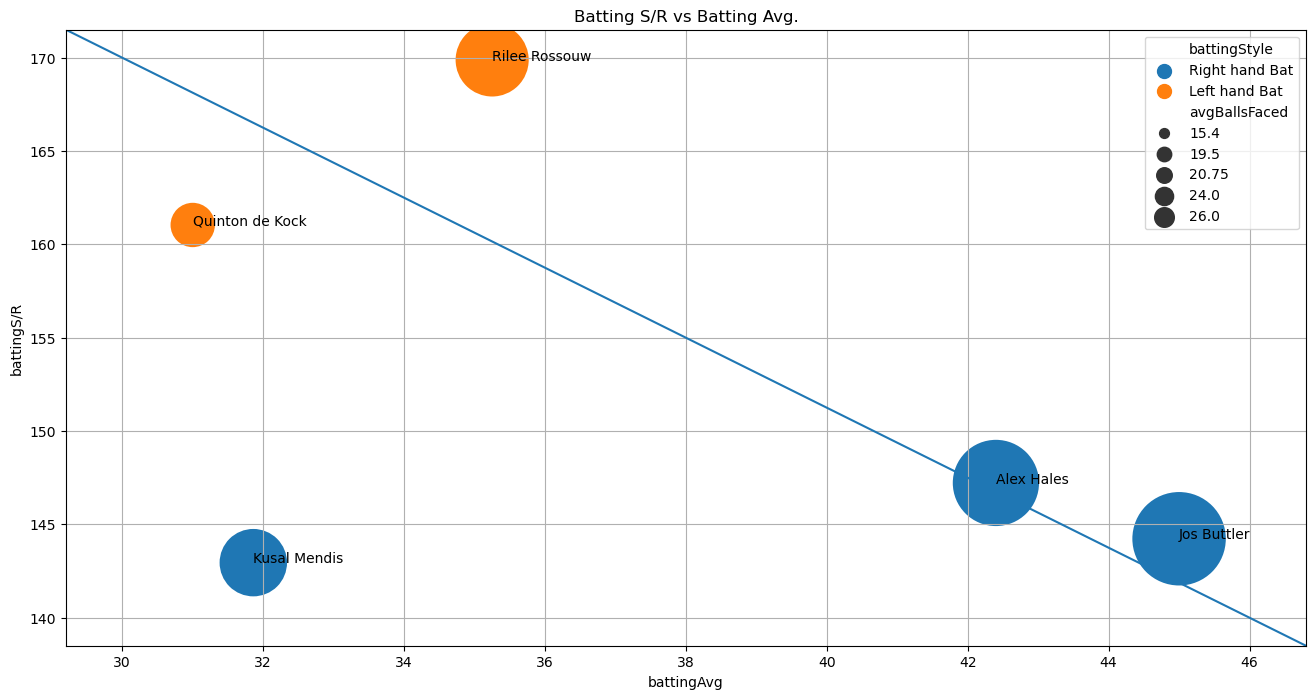

In [119]:
mpl.rcParams['lines.markersize'] = 50             # --> set markersize here
plt.figure(figsize=(16,8))
sns.scatterplot(data=opener, x='battingAvg', y='battingS/R', hue='battingStyle', size='avgBallsFaced', s=100)
for i in range(opener.shape[0]):
    plt.text(x=opener.battingAvg.values[i], y=opener['battingS/R'].values[i], s=opener.index[i])
plt.title('Batting S/R vs Batting Avg.')
plt.axline((30,170), (46, 140))
plt.legend(markerscale=0.2)
plt.grid()
plt.show()

- from the above chart we have three players to be selected as openers & we have to select 2 of them.
- from that we'll go for the combination of left and right for that we choose 
- `Jos Buttler` who stays in the field consistently and 
- `Rilee Rossouw` plays a major role in power hitting to achieve higher score

In [120]:
# same plot using plotly express library
# px.scatter(opener, x='battingAvg', y='battingS/R',size='boundary%', color='battingStyle', text=opener.index)

### 2. Middle_order batsman
we just need 2 of them

In [121]:
middle_order

,team,battingStyle,bowlingStyle,playingRole,runsScored,inningsBatted,inningsDismissed,ballsFaced,battingPos,boundaryRuns,boundary%,battingAvg,avgBallsFaced,battingS/R
name,,,,,,,,,,,,,,
Lorcan Tucker,Ireland,Right hand Bat,,Wicketkeeper Batter,204,7,5,163,3,100,49.02,40.80,23.29,125.15
Virat Kohli,India,Right hand Bat,Right arm Medium,Top order Batter,296,6,3,217,3,148,50.00,98.67,36.17,136.41
Suryakumar Yadav,India,Right hand Bat,"Right arm Medium, Right arm Offbreak",Batter,239,6,4,126,4,158,66.11,59.75,21.00,189.68
Glenn Phillips,New Zealand,Right hand Bat,Right arm Offbreak,Wicketkeeper Batter,201,5,5,127,4,124,61.69,40.20,25.40,158.27
Daryl Mitchell,New Zealand,Right hand Bat,Right arm Medium,Allrounder,109,4,2,85,5,26,23.85,54.50,21.25,128.24


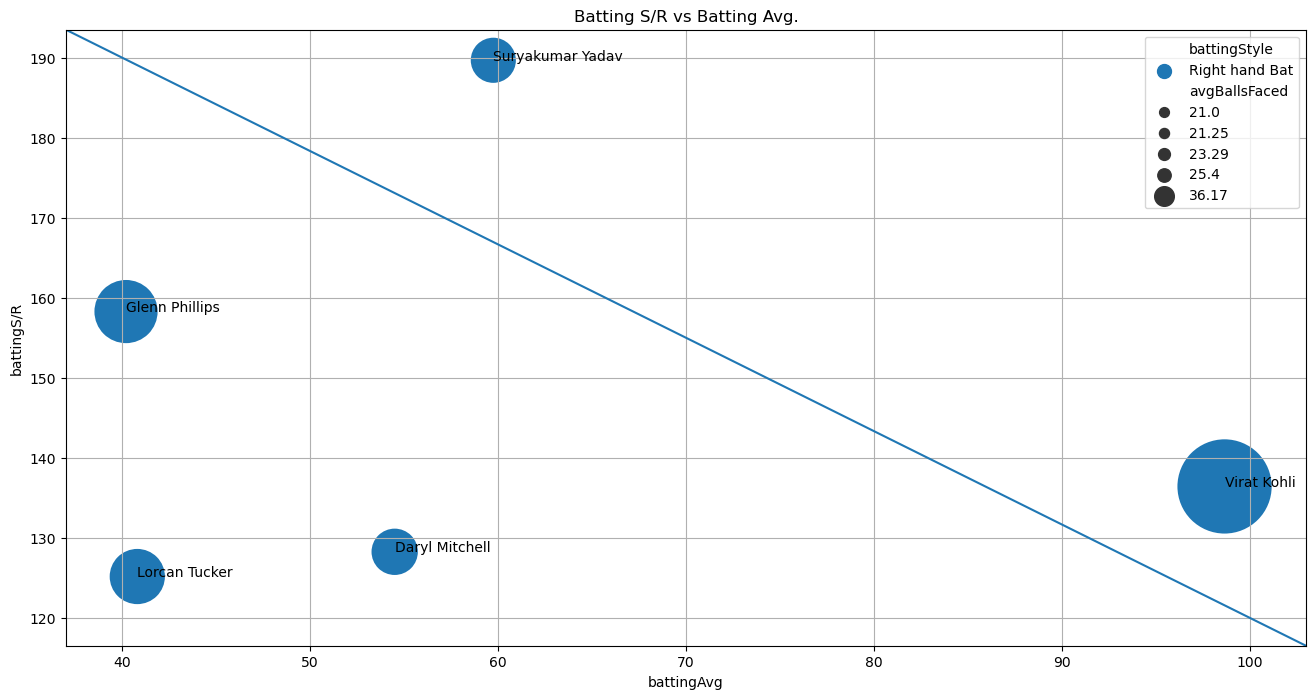

In [122]:
mpl.rcParams['lines.markersize'] = 50             # <---- set markersize here
plt.figure(figsize=(16, 8))
sns.scatterplot(data=middle_order, x='battingAvg', y='battingS/R', hue='battingStyle', size='avgBallsFaced', s=10)
for i in range(middle_order.shape[0]):
    plt.text(x=middle_order.battingAvg.values[i], y=middle_order['battingS/R'].values[i], s=middle_order.index[i])
plt.title('Batting S/R vs Batting Avg.')
plt.axline((40,190), (100, 120))
plt.legend(markerscale=0.2)
plt.grid()
plt.show()

- for middle order we have to choose 2 batsman and that will be surely qualified for that role with their performance across the tournament.
- their batting average consistency and a power hitting abilities made them best over other players.
- `Virat Kohli` and  `Suryakumar Yadav`

### 3. Batting All_rounder
we just need 2 of them

In [123]:
bat_all_rounder

,team,battingStyle,bowlingStyle,playingRole,runsScored,inningsBatted,inningsDismissed,ballsFaced,battingPos,boundaryRuns,...,wickets,ballsBowled,runsConceded,bowlerEconomy,bowlingS/R,bowlingAvg,inningsBowled,dotBalls%,boundaryRunsConceded,boundaryConceded%
name,,,,,,,,,,,,,,,,,,,,,
Glenn Maxwell,Australia,Right hand Bat,Right arm Offbreak,Batting Allrounder,118,4,3,73,4,80,...,3,19,19,6.00,6.33,6.33,2,42.11,2,10.53
Marcus Stoinis,Australia,Right hand Bat,Right arm Medium,Batting Allrounder,126,4,3,78,5,82,...,1,54,87,9.67,54.00,87.00,4,14.81,7,8.05
Sikandar Raza,Zimbabwe,Right hand Bat,Right arm Offbreak,Batting Allrounder,219,8,8,148,5,130,...,10,144,156,6.50,14.40,15.60,8,31.94,9,5.77
Curtis Campher,Ireland,Right hand Bat,Right arm Medium fast,Allrounder,126,6,5,77,5,60,...,2,48,74,9.25,24.00,37.00,4,35.42,11,14.86
Hardik Pandya,India,Right hand Bat,Right arm Medium fast,Allrounder,128,5,5,97,6,70,...,8,108,146,8.11,13.50,18.25,6,38.89,15,10.27


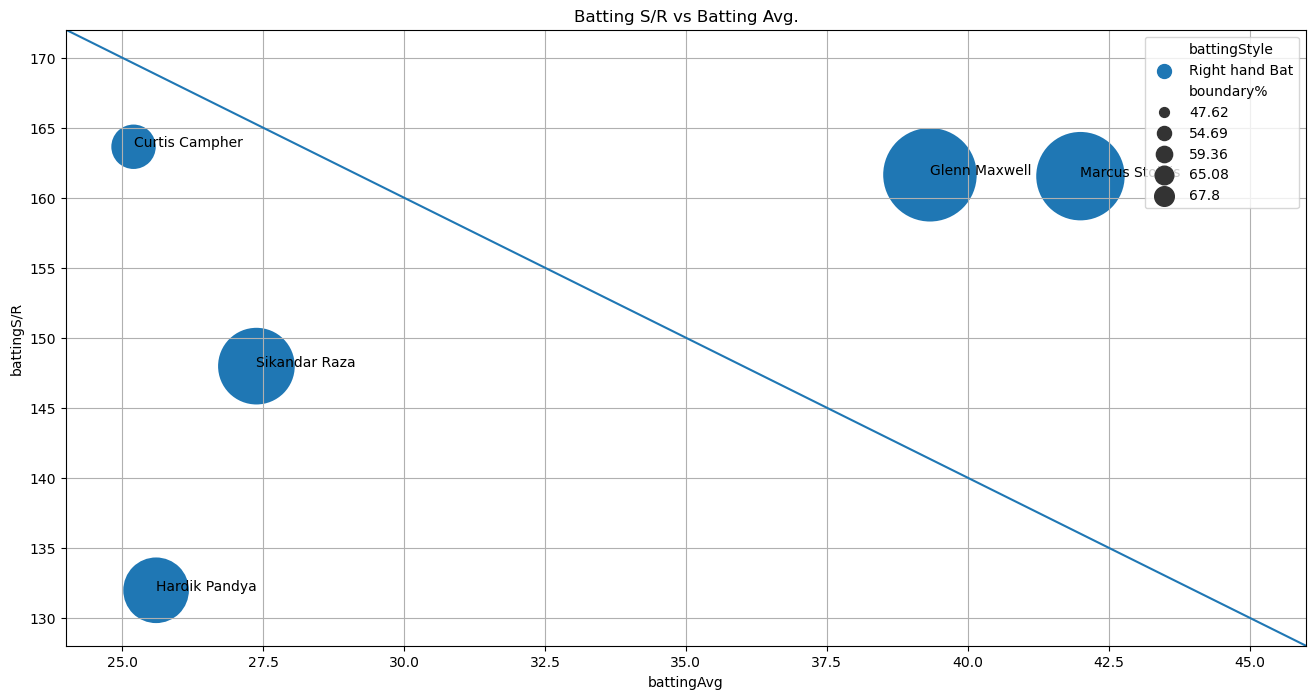

In [124]:
mpl.rcParams['lines.markersize'] = 50             # <---- set markersize here
plt.figure(figsize=(16, 8))
sns.scatterplot(data=bat_all_rounder, x='battingAvg', y='battingS/R', hue='battingStyle', size='boundary%', s=10)
for i in range(bat_all_rounder.shape[0]):
    plt.text(x=bat_all_rounder.battingAvg.values[i], y=bat_all_rounder['battingS/R'].values[i], s=bat_all_rounder.index[i])
plt.title('Batting S/R vs Batting Avg.')
plt.axline((25,170), (45, 130))
plt.legend(markerscale=0.2)
plt.grid()
plt.show()

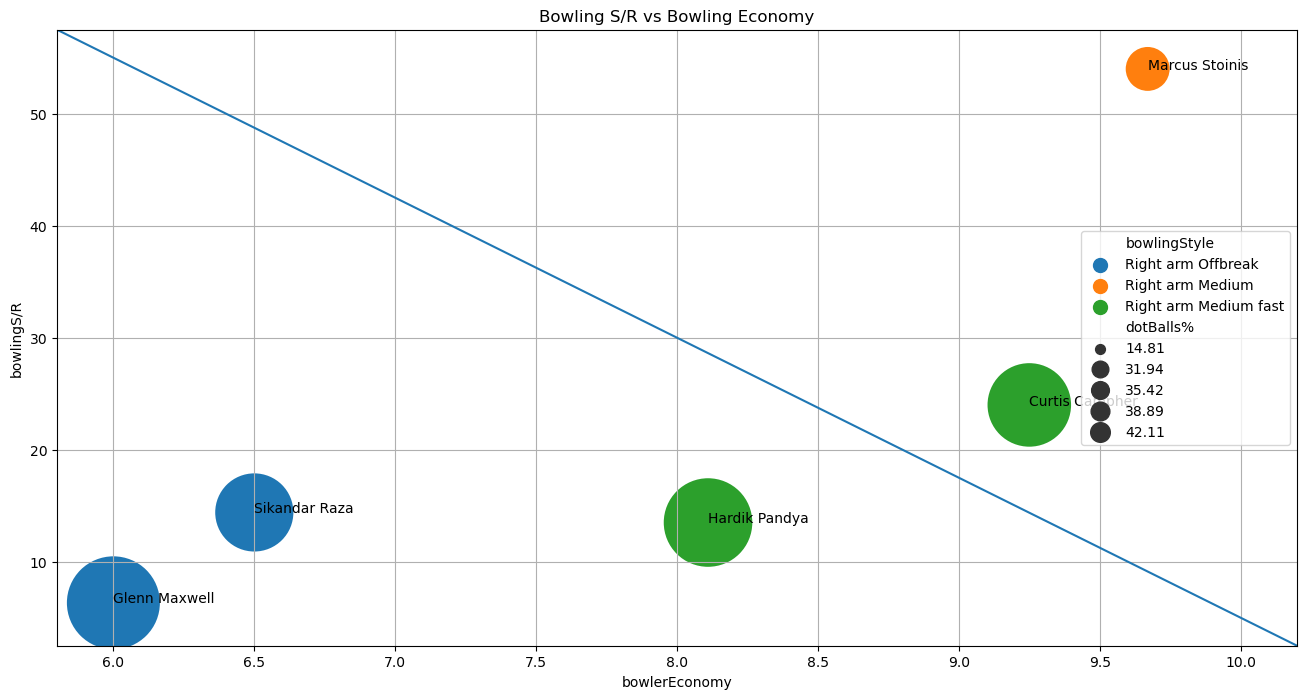

In [135]:
mpl.rcParams['lines.markersize'] = 50             # <---- set markersize here
plt.figure(figsize=(16, 8))
sns.scatterplot(data=bat_all_rounder, x='bowlerEconomy', y='bowlingS/R', hue='bowlingStyle', size='dotBalls%', s=10)
for i in range(bat_all_rounder.shape[0]):
    plt.text(x=bat_all_rounder.bowlerEconomy.values[i], y=bat_all_rounder['bowlingS/R'].values[i], s=bat_all_rounder.index[i])
plt.title('Bowling S/R vs Bowling Economy')
plt.axline((6,55),(10,5))
plt.legend(markerscale=0.2)
plt.grid()
plt.show()

- as batting all rounder we will choose `Glenn Maxwell` and `Marcus Stoinis` for his batting performance
- although `Marcus Stoinis` has not well contribution to bowling 
- we have `Sikandar Raza` as option instead of him for spin and `Hardik Pandya` for fast both of them have boundary hitting abilities

### 4. Bowling All_rounder
we just need 2 of them

In [126]:
bowl_all_rounder

,team,battingStyle,bowlingStyle,playingRole,runsScored,inningsBatted,inningsDismissed,ballsFaced,battingPos,boundaryRuns,...,wickets,ballsBowled,runsConceded,bowlerEconomy,bowlingS/R,bowlingAvg,inningsBowled,dotBalls%,boundaryRunsConceded,boundaryConceded%
name,,,,,,,,,,,,,,,,,,,,,
Sikandar Raza,Zimbabwe,Right hand Bat,Right arm Offbreak,Batting Allrounder,219,8,8,148,5,130,...,10,144,156,6.50,14.40,15.60,8,31.94,9,5.77
Rashid Khan,Afghanistan,Right hand Bat,Legbreak Googly,Bowling Allrounder,57,3,2,32,8,40,...,4,72,77,6.42,18.00,19.25,3,40.28,6,7.79
Shadab Khan,Pakistan,Right hand Bat,Legbreak,Allrounder,98,6,4,58,6,58,...,11,156,165,6.35,14.18,15.00,7,37.82,15,9.09
Mitchell Santner,New Zealand,Left hand Bat,Slow Left arm Orthodox,Bowling Allrounder,27,3,1,16,7,12,...,9,120,129,6.45,13.33,14.33,5,40.83,14,10.85


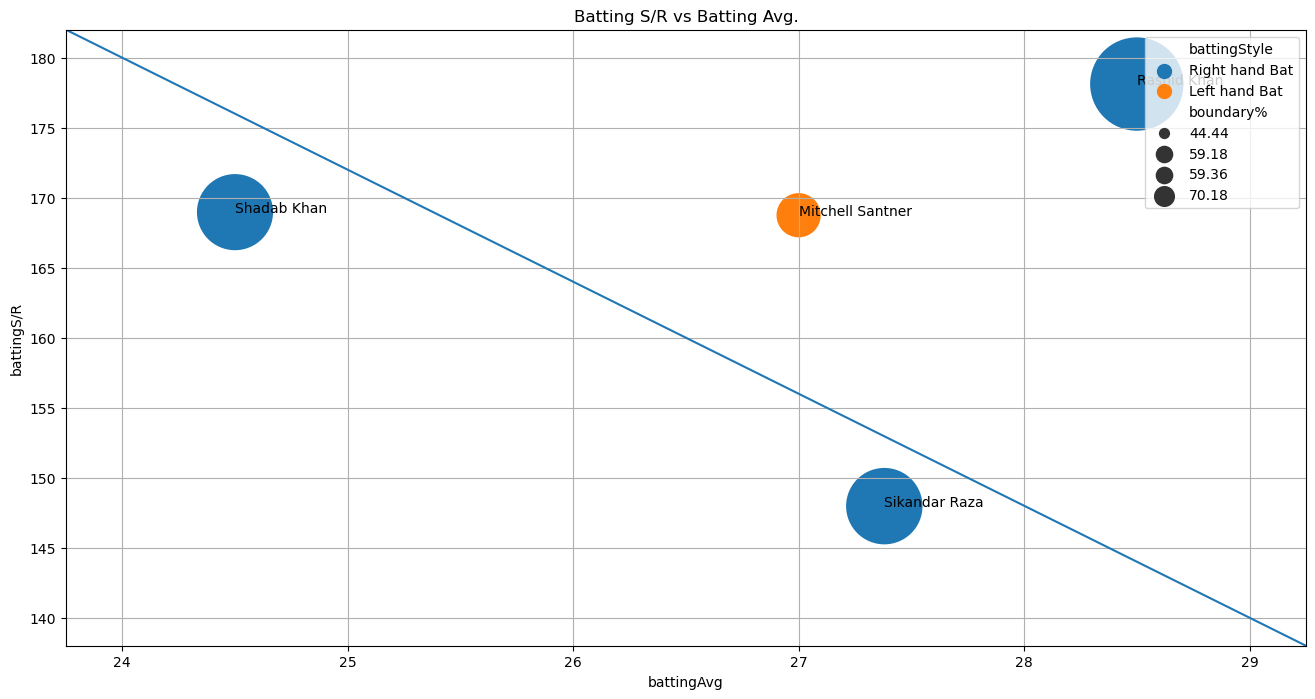

In [127]:
mpl.rcParams['lines.markersize'] = 50             # <---- set markersize here
plt.figure(figsize=(16, 8))
sns.scatterplot(data=bowl_all_rounder, x='battingAvg', y='battingS/R', hue='battingStyle', size='boundary%', s=10)
for i in range(bowl_all_rounder.shape[0]):
    plt.text(x=bowl_all_rounder.battingAvg.values[i], y=bowl_all_rounder['battingS/R'].values[i], s=bowl_all_rounder.index[i])
plt.title('Batting S/R vs Batting Avg.')
plt.axline((24,180), (29, 140))
plt.legend(markerscale=0.2)
plt.grid()
plt.show()

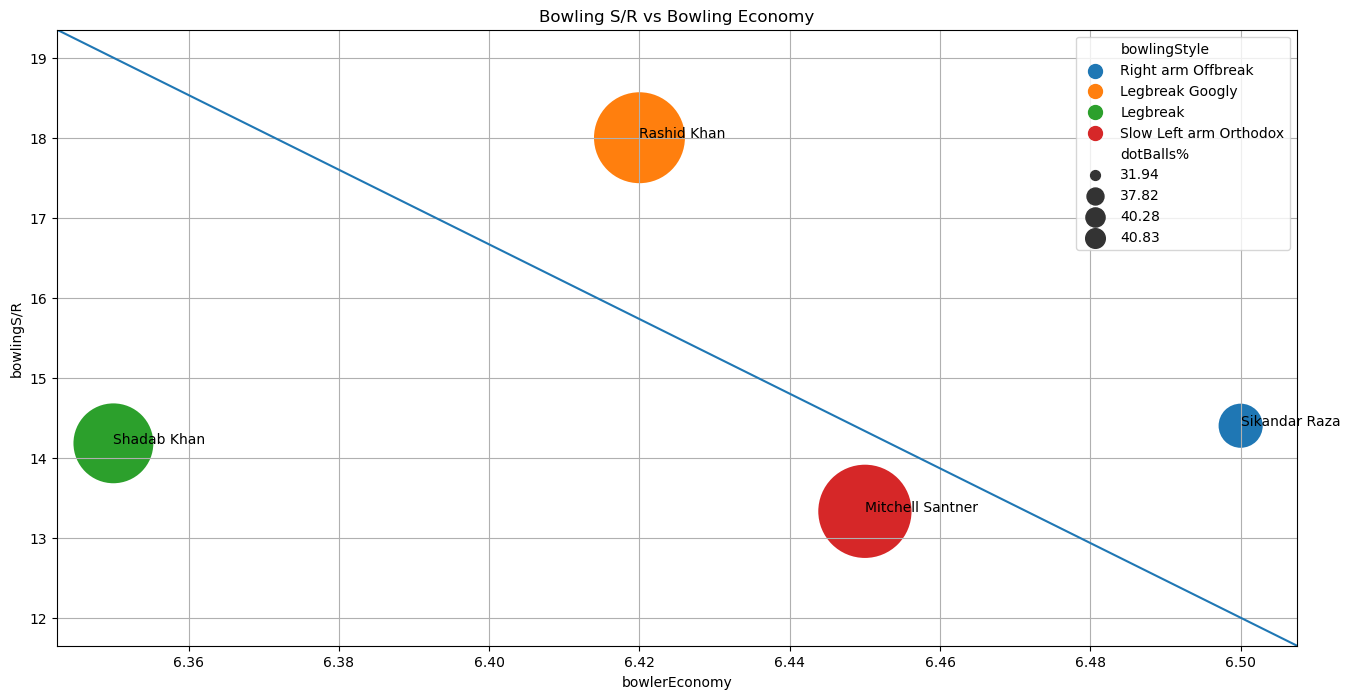

In [134]:
mpl.rcParams['lines.markersize'] = 50             # <---- set markersize here
plt.figure(figsize=(16, 8))
sns.scatterplot(data=bowl_all_rounder, x='bowlerEconomy', y='bowlingS/R', hue='bowlingStyle', size='dotBalls%', s=10)
for i in range(bowl_all_rounder.shape[0]):
    plt.text(x=bowl_all_rounder.bowlerEconomy.values[i], y=bowl_all_rounder['bowlingS/R'].values[i], s=bowl_all_rounder.index[i])
plt.axline((6.35,19),(6.5,12))
plt.title('Bowling S/R vs Bowling Economy')
plt.legend(markerscale=0.2)
plt.grid()
plt.show()

- for batting performance `Mitchell Santner` and `Rashid Khan` well qualified
- for bowling performance `Shadab Khan`, `Mitchell Santner` and `Sikandar Raza` qualifies
- as bowling all rounder we will choose `Shadab Khan` and `Mitchell Santner`who well performs with his bat also

### 5. Fasters/Pacers
we just need 3 of them

In [129]:
faster

,team,battingStyle,bowlingStyle,playingRole,wickets,ballsBowled,runsConceded,bowlerEconomy,bowlingS/R,bowlingAvg,inningsBowled,dotBalls%,boundaryRunsConceded,boundaryConceded%
name,,,,,,,,,,,,,,
Sam Curran,England,Left hand Bat,Left arm Medium fast,Allrounder,13,136,148,6.53,10.46,11.38,6,48.53,14,9.46
Shaheen Shah Afridi,Pakistan,Left hand Bat,Left arm Fast,Bowler,11,151,155,6.16,13.73,14.09,7,46.36,16,10.32
Anrich Nortje,South Africa,Right hand Bat,Right arm Fast,Bowler,11,105,94,5.37,9.55,8.55,5,55.24,8,8.51
Tim Southee,New Zealand,Right hand Bat,Right arm Medium fast,Bowler,7,104,114,6.58,14.86,16.29,5,50.00,14,12.28
Mitchell Santner,New Zealand,Left hand Bat,Slow Left arm Orthodox,Bowling Allrounder,9,120,129,6.45,13.33,14.33,5,40.83,14,10.85


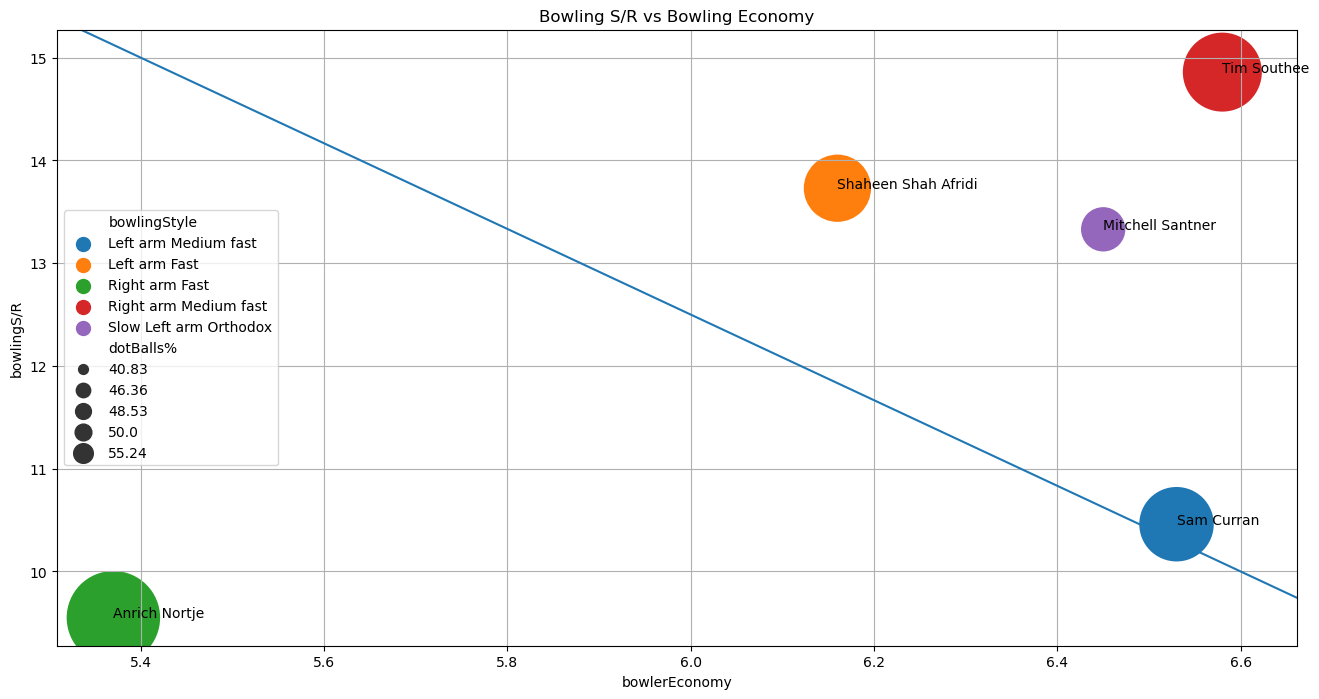

In [133]:
mpl.rcParams['lines.markersize'] = 50             # <---- set markersize here
plt.figure(figsize=(16, 8))
sns.scatterplot(data=faster, x='bowlerEconomy', y='bowlingS/R', hue='bowlingStyle', size='dotBalls%', s=10)
for i in range(faster.shape[0]):
    plt.text(x=faster.bowlerEconomy.values[i], y=faster['bowlingS/R'].values[i], s=faster.index[i])
plt.title('Bowling S/R vs Bowling Economy')
plt.axline((5.4,15), (6.6, 10))
plt.legend(markerscale=0.2)
plt.grid()
plt.show()

- here every bowler has almost same in performance but we have to choose only 3 of them.
- so, we will go for `Anrich Nortje` and `Sam Curran` for their wicket taking ability.
- and third bowler as `Shaheen Shah Afridi`.

in terms of bowling we have `Anrich Nortje` for his best performance and `Shaheen Shah Afridi` and `Sam Curran`

#  Step 4 :- Drawing Conclusions

### Now Analysing whole team performance

In [131]:
def build_team(players):
    
    """Take list of players and after applying some functions over it returns it as dataframe having all information of team"""
    
    parameters = all_rounder[['battingStyle', 'bowlingStyle', 'battingAvg', 'battingS/R','boundary%', 'avgBallsFaced', 'bowlingAvg', 'bowlingS/R', 'bowlerEconomy', 'dotBalls%']]
    final_team = parameters.loc[players]
    
    final_team.replace(0, np.nan, inplace=True)

    total = final_team.mean(numeric_only=True)

    final_team.reset_index(inplace=True)

    # final_team = final_team.append(total, ignore_index=True).fillna('-')
    final_team.loc[len(final_team)] = total
    
    final_team.iloc[:, 3:] = round(final_team.iloc[:, 3:], 2)   # that one line
    final_team.iloc[len(players),0] = 'Total Performance'
    final_team.set_index('name', inplace=True)
    
    final_team.fillna('-', inplace=True) # if we keep this line before that line below this will not round up the remaining columns where values are null

    return final_team

In [132]:
players = ['Jos Buttler',
           # 'Alex Hales',
           'Rilee Rossouw',
           'Virat Kohli',
           'Suryakumar Yadav',
           'Glenn Maxwell',
           'Marcus Stoinis',
           # 'Hardik Pandya',
           # 'Sikandar Raza',
           'Mitchell Santner',
           'Shadab Khan',
           'Anrich Nortje',
           'Shaheen Shah Afridi',
           'Sam Curran']

build_team(players)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10796\1976966257.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  final_team.fillna('-', inplace=True) # if we keep this line before that line below this will not round up the remaining columns where values are null


,battingStyle,bowlingStyle,battingAvg,battingS/R,boundary%,avgBallsFaced,bowlingAvg,bowlingS/R,bowlerEconomy,dotBalls%
name,,,,,,,,,,
Jos Buttler,Right hand Bat,,45.00,144.23,61.33,26.00,-,-,-,-
Rilee Rossouw,Left hand Bat,Right arm Offbreak,35.25,169.88,63.83,20.75,-,-,-,-
Virat Kohli,Right hand Bat,Right arm Medium,98.67,136.41,50.00,36.17,-,-,-,-
Suryakumar Yadav,Right hand Bat,"Right arm Medium, Right arm Offbreak",59.75,189.68,66.11,21.00,-,-,-,-
Glenn Maxwell,Right hand Bat,Right arm Offbreak,39.33,161.64,67.80,18.25,6.33,6.33,6.0,42.11
Marcus Stoinis,Right hand Bat,Right arm Medium,42.00,161.54,65.08,19.50,87.0,54.0,9.67,14.81
Mitchell Santner,Left hand Bat,Slow Left arm Orthodox,27.00,168.75,44.44,5.33,14.33,13.33,6.45,40.83
Shadab Khan,Right hand Bat,Legbreak,24.50,168.97,59.18,9.67,15.0,14.18,6.35,37.82
Anrich Nortje,Right hand Bat,Right arm Fast,5.00,83.33,80.00,3.00,8.55,9.55,5.37,55.24


figures of each players in a playing team given below 
- if we need a team which is good at batting then we  will go  for  Marcus  Stoinis --> 36.82  150.06  61.30  16.22  22.38  17.37  6.65  40.81
  
- if we need a team which is good at fast bowling then we will go for Hardik Pandya  --> 35.46  147.59  60.43  16.21  12.56  11.58  6.42  44.25
  
- if we need a team which is good at spin bowling then we will go for Sikandar Raza  --> 35.61  148.93  60.82  16.14  12.18  11.71  6.19  43.26

#  Step 5 :- Communicating Results

- from the above dataframe we can conclude that our team has been qualifies the objectives that we set.
- the team is able to score 180+ runs with the batting strike rate of 150+.
- the good batting average and average balls faced by each players results the team will survive it does not fall to all out.
- good boundary percentage results the team is full of hard hitters who gets most of the runs through boundaries....
- in bowling point of view it performs very well.
- if we not bowl stoinis we plays with 3 spinners and 3 fasters
- our bowling average falls below to 11.61 that is our team is capable of taking wicket for each 11.61 balls
- our bowling strike rate falls below to 11.26 that is our team is capable of taking wicket for each 11.26 runs....
- in case if we need an extra bowler we can go with `Hardik Pandya` who bowls medium fast and `Sikandar Raza` who bowls offbreak